### PROJETO 1 REDES SOCIAIS

**GRUPO D:** 
- ESTHER DAGIR
- FELIPE LEMOS
- JV PAZOTTI

**DESCRIÇÃO DATASET CORD19**

Artigos acadêmicos relacionados ao COVID-19 e suas variantes que integram o dataset CORD-19. Coleção mais extensa (+134.000 artigos) de pesquisa sobre coronavírus legível por máquina disponível para mineração de dados até o momento, solicitada pelo governo americano em conjunto com entidades de pesquisa sobre o vírus e suas variantes. 

### Importando as Bibliotecas


In [48]:
import pandas as pd
import seaborn as sns
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *

### Dataset

In [49]:
data = pd.read_csv("metadata.csv")

/tmp/ipykernel_64/304384523.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("metadata.csv")


In [50]:
unique_journals = data['journal'].unique().tolist()
len(unique_journals)

54994

In [51]:
unique_df = data.drop_duplicates(subset=['journal'])

In [52]:
data=unique_df
unique_df.shape

(54994, 19)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54994 entries, 0 to 1056494
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          54994 non-null  object 
 1   sha               10908 non-null  object 
 2   source_x          54994 non-null  object 
 3   title             54971 non-null  object 
 4   doi               33869 non-null  object 
 5   pmcid             12731 non-null  object 
 6   pubmed_id         13891 non-null  object 
 7   license           54994 non-null  object 
 8   abstract          44920 non-null  object 
 9   publish_time      54966 non-null  object 
 10  authors           53561 non-null  object 
 11  journal           54993 non-null  object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  35174 non-null  object 
 14  arxiv_id          47 non-null     object 
 15  pdf_json_files    10908 non-null  object 
 16  pmc_json_files    9110 non-null   obje

In [54]:
data=data.copy().drop(columns=['pdf_json_files','pmc_json_files','arxiv_id','pmcid','mag_id','s2_id'])

In [55]:
data['authors'] = data['authors'].astype(str)

### Construindo a rede de coautoria

In [146]:
collabs = {}
coautorias = [] 

for authors in data['authors']:
    authors_list = authors.split('; ')
    # percorre todos os pares de autores na lista
    for i in range(len(authors_list)):
        for j in range(i+1, len(authors_list)):
#             print([authors_list[i],':',  authors_list[j]])
            # ordena os nomes dos autores em ordem alfabética para evitar duplicatas
            pair = tuple(sorted([authors_list[i], authors_list[j]]))
            coautorias.append(pair)          
            collabs[pair] = collabs.get(pair, 0) + 1  
#         print('saiu autor')
            
coautorias_unicas = []
coautorias_set = set()

for coautoria in coautorias:
    coautoria_ordenada = tuple(sorted(coautoria))
    if coautoria_ordenada not in coautorias_set:
        coautorias_unicas.append(coautoria)
        coautorias_set.add(coautoria_ordenada)
        
        
coautorias_count = {}

for coautoria in coautorias_unicas:
    autor1, autor2 = coautoria
    
    coautorias_count[autor1] = coautorias_count.get(autor1, 0) + 1
    coautorias_count[autor2] = coautorias_count.get(autor2, 0) + 1

coautorias_filtradas = []

for coautoria in coautorias_unicas:
    autor1, autor2 = coautoria
    
    if coautorias_count.get(autor1, 0) >= 3 and coautorias_count.get(autor1, 0) < 50 and coautorias_count.get(autor2, 0) >= 3 and coautorias_count.get(autor2, 0) <50:
        
        coautorias_filtradas.append(coautoria)
        
    
inf_coautorias_count = {} #contagem entre autores influentes

for coautoria in coautorias_filtradas:
    autor1, autor2 = coautoria
    
    inf_coautorias_count[autor1] = inf_coautorias_count.get(autor1, 0) + 1
    inf_coautorias_count[autor2] = inf_coautorias_count.get(autor2, 0) + 1
    

inf_coautorias_filtradas = []

for coautoria in coautorias_filtradas:
    autor1, autor2 = coautoria
    
    if inf_coautorias_count.get(autor1, 0) > 6 and inf_coautorias_count.get(autor2, 0) > 6:
        
        inf_coautorias_filtradas.append(coautoria)
    

In [129]:
# #célula de testes 
# coautorias_unicas = [
#     ('a', 'b'), ('a', 'd'), ('a', 'f'),
#     ('f', 'i'), ('k', 'm'), ('o', 'p'),
#     ('f', 't'), ('p', 'm'), ('o', 't'),
#     ('f', 'j'), ('k', 'l'), ('a', 'p'),
#     ('f', 'p'), ('k', 'i'), ('o', 'f'),
# ]

        
# coautorias_count = {}

# for coautoria in coautorias_unicas:
#     autor1, autor2 = coautoria
    
#     coautorias_count[autor1] = coautorias_count.get(autor1, 0) + 1
#     coautorias_count[autor2] = coautorias_count.get(autor2, 0) + 1

# coautorias_filtradas = []

# for coautoria in coautorias_unicas:
#     autor1, autor2 = coautoria
    
#     if coautorias_count.get(autor1, 0) >= 3 and coautorias_count.get(autor1, 0) < 50 and coautorias_count.get(autor2, 0) >= 3 and coautorias_count.get(autor2, 0) <50:
        
#         coautorias_filtradas.append(coautoria)
        
        
# inf_coautorias_count = {}

# for coautoria in coautorias_filtradas:
#     autor1, autor2 = coautoria
    
#     inf_coautorias_count[autor1] = inf_coautorias_count.get(autor1, 0) + 1
#     inf_coautorias_count[autor2] = inf_coautorias_count.get(autor2, 0) + 1
    
# inf_coautorias_filtradas = []

# for coautoria in coautorias_filtradas:
#     autor1, autor2 = coautoria
    
#     if inf_coautorias_count.get(autor1, 0) >= 3 and inf_coautorias_count.get(autor2, 0) >= 3:
        
#         inf_coautorias_filtradas.append(coautoria)

# print(coautorias_count) #        {'a': 4, 'b': 1, 'd': 1, 'f': 6, 'i': 2, 'k': 3, 'm': 2, 'o': 3, 'p': 4, 't': 2, 'j': 1, 'l': 1}
# print(coautorias_filtradas) #    [('a', 'f'), ('o', 'p'), ('a', 'p'), ('f', 'p'), ('o', 'f')]
# print(inf_coautorias_count) #    {'a': 2, 'f': 3, 'o': 2, 'p': 3}
# print(inf_coautorias_filtradas)# [('f', 'p')]

{'a': 4, 'b': 1, 'd': 1, 'f': 6, 'i': 2, 'k': 3, 'm': 2, 'o': 3, 'p': 4, 't': 2, 'j': 1, 'l': 1}
[('a', 'f'), ('o', 'p'), ('a', 'p'), ('f', 'p'), ('o', 'f')]
{'a': 2, 'f': 3, 'o': 2, 'p': 3}
[('f', 'p')]


In [147]:
import numpy as np


quantidades = list(inf_coautorias_count.values())

media = np.mean(quantidades)
mediana = np.median(quantidades)


print("Média: ", media)
print("Mediana: ", mediana)



Média:  8.799515758040434
Mediana:  6.0


In [148]:
g = Graph(directed=False) # não dirigido

In [149]:
autores = set()

for coautoria in inf_coautorias_filtradas:
    autor1, autor2 = coautoria
    autores.add(autor1)
    autores.add(autor2)
    
for author in autores:
    g.add_vertex(author) 

In [150]:
for coautoria in inf_coautorias_filtradas:
    autor1, autor2 = coautoria
    if autor1 != autor2: 
        g.add_edge(autor1, autor2)

In [151]:
cord19 = gt_data(g)

In [152]:
n = g.num_vertices()
m =  g.num_edges()
max_edges = n * (n - 1) if g.is_directed() else n * (n - 1) // 2
d = m / max_edges

print('Número de vértices de g:', n)
print('Número de arestas de g:', m)
print('Máximo possível de arestas de g:', max_edges)
print('Densidade de g:', d)

Número de vértices de g: 60569
Número de arestas de g: 400526
Máximo possível de arestas de g: 1834271596
Densidade de g: 0.00021835697661863593


In [ ]:
# for v in g.all_vertices():
#     if v.total_degree()==1:
#         try:
#             g.remove_vertex(v['id'])
#         except ValueError as e:
#             print("Erro ao retirar o vertice {}: {}".format(v, e))

In [153]:
degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())

cord19['degree'] = degrees
cord19

degree
id                           
Yu, Jiajian                11
McKoy, Nikki                7
Kiesel, Matthias            7
Shen, Fan-Xia               7
Makinodan, M.               8
...                       ...
Krishnan, P. K.            41
Schwarzkopf, Susanne        8
Pappusamy, Manikantan      12
He, G. X.                  10
Zhang, Jun-Dong            10

[60569 rows x 1 columns]

In [155]:
cord19['degree'].value_counts()

7     9869
8     8130
9     6625
10    4742
11    3917
12    3346
13    2984
14    2435
15    2047
18    1735
17    1694
16    1601
20    1175
19    1127
23     880
22     776
21     756
24     467
28     458
32     411
29     402
25     391
34     331
27     328
37     328
1      327
30     326
35     314
26     296
33     247
2      218
43     207
3      190
44     187
39     170
31     166
40     147
38     129
5      104
4      102
45     100
36      70
41      59
42      58
49      52
48      51
47      50
6       34
46      10
Name: degree, dtype: int64

In [156]:
cord19.to_csv('cord19.csv')

count    60569.000000
mean        13.225445
std          7.754361
min          1.000000
25%          8.000000
50%         10.000000
75%         16.000000
max         49.000000
Name: degree, dtype: float64

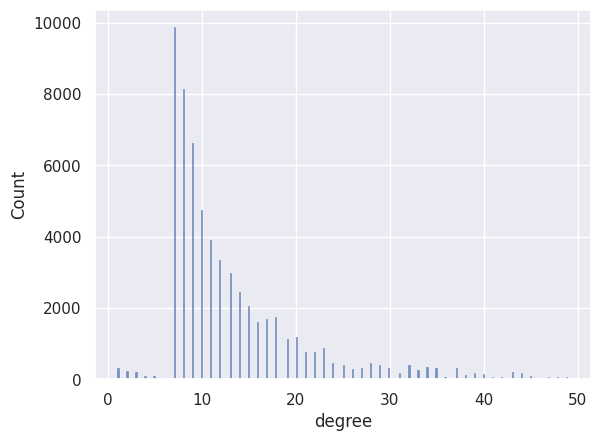

In [157]:
sns.histplot(cord19['degree'],bins=200)
cord19['degree'].describe()

In [158]:
gt_save(g, './cord19_graph.net.gz')

In [161]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, './cord19_graph.net.gz')
r = netpixi.render('./cord19_graph.net.gz', infinite=True)

In [160]:
from graph_tool import spectral
import cpnet

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [162]:
r.vertex_default(color=0x09DB8F ,size=5)
r.edge_default(color=0xFFFFFF, width=0.5)

In [163]:
matrix = spectral.adjacency(g)

# Além de cpnet.Rombach, há outras
# opções de algoritmos contínuos:
# cpnet.MINRES
# cpnet.Rossa

algorithm = cpnet.Rombach()
algorithm.detect(matrix)
c = algorithm.get_coreness()

# Depois do código acima, c é um dicionário
# em que as chaves são índices de vértices e
# valores são os atribuídos pelo algoritmo.

g.add_vp('coreness')
for i, coreness in c.items():
    v = g.get_vertex_by_index(i)
    v['coreness'] = float(coreness)

# Vamos usar coreness como referência para
# o tamanho dos vértices. Estabelecemos 10
# como o menor tamanho possível e 40 como
# o maior tamanho possível. Como o coreness
# está entre 0 e 1, a conta é bem simples.

for v in g.all_vertices():
    r.vertex(v['id'], size=(10 + 40 * v['coreness']))

# Quando a execução desta célula terminar,
# veja como ficou a visualização acima.

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
